In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [2]:
def visual_summary(type_, df, col):
    """Summarize the Data using Visual Method.
    
    This function accepts the type of visualization, the data frame and the column to be summarized.
    It displays the chart based on the given parameters.
    
    Keyword arguments:
    type_ -- visualization method to be used
    df -- the dataframe
    col -- the column in the dataframe to be summarized
    """
    if type_ == 'hist':
        df[col].hist(bins = 20)
        plt.show()
    elif type_ == 'scatter':
        plt.scatter(df[col[0]], df[col[1]])
        plt.show()
    elif type_ == 'pie':
        plt.pie(df[col].value_counts())
        plt.show()
    else:
        print("Call the function again with proper parameters.")
    

In [3]:
def central_tendency(type_, df, col):
    """Calculate the measure of central tendency.
    
    This function accepts the type of central tendency to be calculated, the data frame and the required column.
    It returns the calculated measure.
    
    Keyword arguments:
    type_ -- type of central tendency to be calculated
    df -- the dataframe
    col -- the column in the dataframe to do the calculations
    
    Returns:
    cent_tend -- the calculated measure of central tendency
    """
    if type_== 'mean':
        cent_tend = df[col].mean()
    if type_ == 'mode':
        cent_tend = df[col].mode()
    if type_ == 'median':
        cent_tend = df[col].median()
        
    return cent_tend


In [4]:
def measure_of_dispersion(type_, df, col):
    """Calculate the measure of dispersion.
    
    This function accepts the measure of dispersion to be calculated, the data frame and the required column(s).
    It returns the calculated measure.
    
    Keyword arguments:
    type_ -- type of central tendency to be calculated
    df -- the dataframe
    col -- the column(s) in the dataframe to do the calculations, this is a list with 2 elements if we want to calculate covariance
    
    Returns:
    disp -- the calculated measure of dispersion
    """
    if type_ == 'range':
        maximum = df[col].max()
        minimum = df[col].min()
        disp = maximum - minimum 
        
    elif type_ == 'MAD':
        mean = df[col].mean()
        distance = abs(df[col] - mean)
        disp = distance.sum()/len(distance)
        
    elif type_ == 'std dev':
        mean = df[col].mean()
        distance = (df[col] - mean)**2
        disp = (distance.sum()/len(distance))**(1/2)
        
    elif type_ == 'CV':
        mean = df[col].mean()
        std = measure_of_dispersion('std dev', df, col)
        disp = (std/mean)*100
        
    elif type_ == 'iqr':
        q1 = df[col].quantile(q=0.25)
        q3 = df[col].quantile(q=0.75)
        disp = q3-q1
        
    elif type_ == 'cov':
        new = df[col]
        mean_col1 = new[col[0]].mean()
        mean_col2 = new[col[1]].mean()
        diff_col1 = (new[col[0]] - mean_col1)
        diff_col2 = (new[col[1]] - mean_col2)
        summation = (diff_col1 * diff_col2).sum()
        n = new.shape[0]
        disp = summation/n

    else:
        print("Call the measure_of_dispersion() with proper parameters.")
    
    

    
    return disp



In [5]:
def calculate_correlation(type_, df, col1, col2):
    """Calculate the defined correlation coefficient.
    
    This function accepts the type of correlation coefficient to be calculated, the data frame and the two column.
    It returns the calculated coefficient.
    
    Keyword arguments:
    type_ -- type of correlation coefficient to be calculated
    df -- the dataframe
    col1 -- first column
    col2 -- second column
    
    Returns:
    corr -- the calculated correlation coefficient
    """
    newdf = df[[col1, col2]]
    
    if type_ == 'Pearson':
        # Calulating Pearson correlation coefficient
        covariance = newdf.cov().iloc[0,1]
        std_col1 = newdf[col1].std()
        std_col2 = newdf[col2].std()
        corr = covariance/(std_col1*std_col2)
        
    elif type_ == 'Spearman':
        # Calculating Spearman rank correlation coefficient
        ranks = newdf.rank(axis=0)
        ranks['d^2'] = (ranks[col1] - ranks[col2])**2
        d_square = ranks['d^2'].sum()
        n = ranks.shape[0]
        corr = 1 - ((6*d_square)/(n**3 - n))
        
    else:
        print("Call the calculate_correlation() with proper parameters.")
    
    
    return corr


In [6]:
def calculate_probability_discrete(data, event):
    """Calculates the probability of an event from a discrete distribution.
    
    This function accepts the distribution of a variable and the event, and returns the probability of the event.
    
    Keyword arguments:
    data -- series that contains the distribution of the discrete variable
    event -- the event for which the probability is to be calculated
    
    Returns:
    prob -- calculated probability fo the event
    """
    total = data.value_counts().sum()
    yes = data.value_counts()[event]
    prob = yes/total
    
    
    return prob
    



In [7]:
def event_independence_check(prob_event1, prob_event2, prob_event1_event2):
    """Checks if two events are independent.
    
    This function accepts the probability of 2 events and their joint probability.
    And prints if the events are independent or not.
    
    Keyword arguments:
    prob_event1 -- probability of event1
    prob_event2 -- probability of event2
    prob_event1_event2 -- probability of event1 and event2
    """
    
    if (prob_event1_event2 == prob_event1 * prob_event2):
        print("Event 1 and Event 2 are independent.")
    else:
        print("Event 1 and Event 2 are not independent.")




In [8]:
def bayes_theorem(df, col1, event1, col2, event2):
    """Calculates the conditional probability using Bayes Theorem.
    
    This function accepts the dataframe, two columns along with two conditions to calculate the probability, P(B|A).
    You can call the calculate_probability_discrete() to find the basic probabilities and then use them to find the conditional probability.
    
    Keyword arguments:
    df -- the dataframe
    col1 -- the first column where the first event is recorded
    event1 -- event to define the first condition
    col2 -- the second column where the second event is recorded
    event2 -- event to define the second condition
    
    Returns:
    prob -- calculated probability for the event1 given event2 has already occured
    """
    p_A = calculate_probability_discrete(df[col1],event1)
    p_B = calculate_probability_discrete(df[col2],event2)
    p_B_given_A = calculate_probability_discrete(df[df[col1]==event1][col2],event2)
    
    prob = (p_A*p_B_given_A)/p_B
        
    return prob



In [10]:
# Load the dataset
path = "/Users/rahulkosamkar/Documents/Data_Science/Projects/Descriptive_stats_and_Probability/Probability_and_stats_extracting_business_insights /extracting_business_insights_data_set.csv"
df = pd.read_csv(path)
print(df.head())


   case  cc3  country  year  systemic_crisis  exch_usd  \
0     1  DZA  Algeria  1870                1  0.052264   
1     1  DZA  Algeria  1871                0  0.052798   
2     1  DZA  Algeria  1872                0  0.052274   
3     1  DZA  Algeria  1873                0  0.051680   
4     1  DZA  Algeria  1874                0  0.051308   

   domestic_debt_in_default  sovereign_external_debt_default  \
0                         0                                0   
1                         0                                0   
2                         0                                0   
3                         0                                0   
4                         0                                0   

   gdp_weighted_default  inflation_annual_cpi  independence  currency_crises  \
0                   0.0              3.441456             0                0   
1                   0.0             14.149140             0                0   
2                   0.0   

Distribution of the Countries


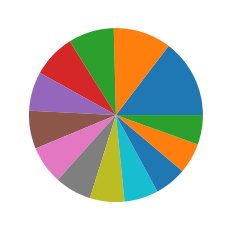

Distribution of exch_usd


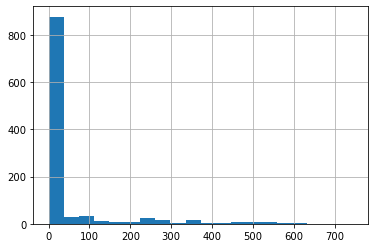

Country:  Algeria


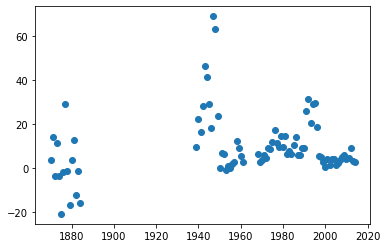

Country:  Angola


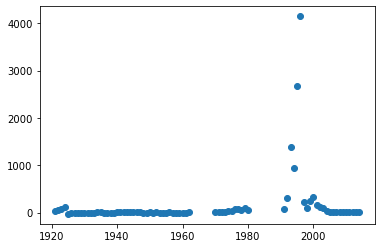

Country:  Central African Republic


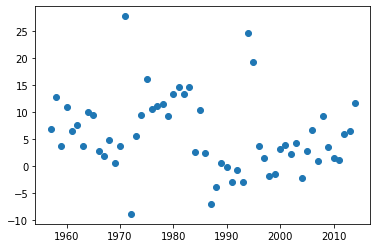

Country:  Ivory Coast


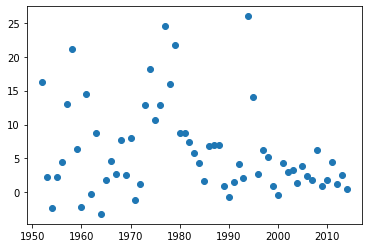

Country:  Egypt


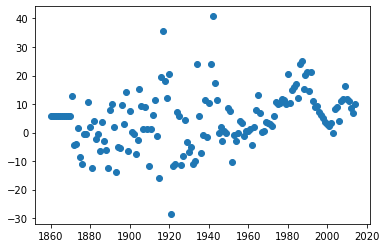

Country:  Kenya


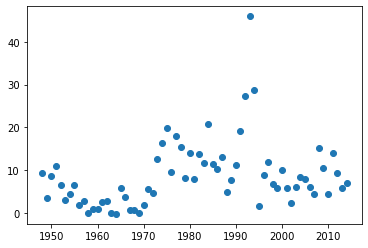

Country:  Mauritius


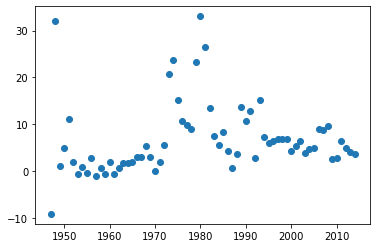

Country:  Morocco


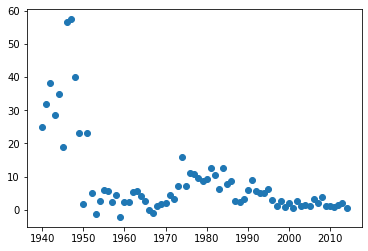

Country:  Nigeria


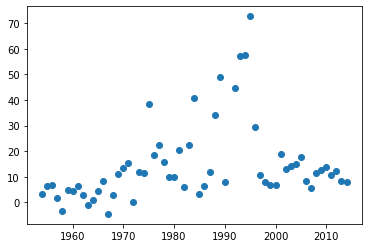

Country:  South Africa


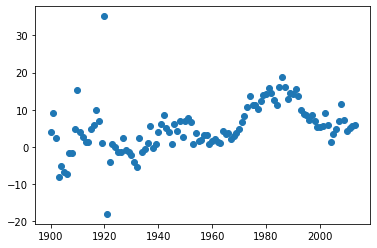

Country:  Tunisia


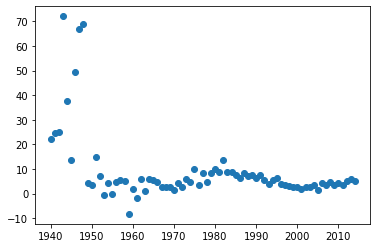

Country:  Zambia


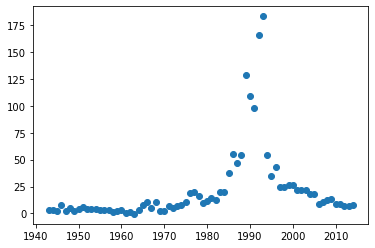

Country:  Zimbabwe


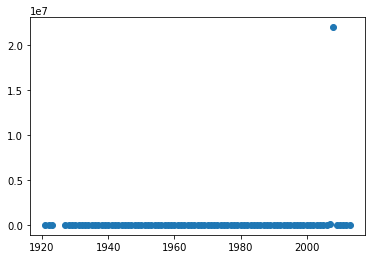

In [11]:
# Using the visual_summary(), visualize the distribution of the data provided.
# You can also do it at country level or based on years by passing appropriate arguments to the fuction.
print("Distribution of the Countries")
visual_summary('pie', df, 'country')
print("Distribution of exch_usd")
visual_summary('hist', df, 'exch_usd')

for c in list(df['country'].unique()):
    print("Country: ", c)
    visual_summary('scatter', df[df['country'] == c], ['year', 'inflation_annual_cpi'])



In [12]:
# You might also want to see the central tendency of certain variables. Call the central_tendency() to do the same.
# This can also be done at country level or based on years by passing appropriate arguments to the fuction.
print("Mean of exch_usd:", central_tendency('mean', df, 'exch_usd'))
print("Mode of country", central_tendency('mode', df, 'country'))
print("Median of exch_usd:", central_tendency('median', df, 'exch_usd'))



Mean of exch_usd: 43.14083067115856
Mode of country 0    Egypt
dtype: object
Median of exch_usd: 0.8684


In [13]:
# Measures of dispersion gives a good insight about the distribution of the variable.
# Call the measure_of_dispersion() with desired parameters and see the summary of different variables.
print("Range of inflation_annual_cpi: ", measure_of_dispersion('range', df, 'inflation_annual_cpi'))
print("MAD of gdp_weighted_default:", measure_of_dispersion('MAD', df, 'gdp_weighted_default'))
print("CV of gdp_weighted_default:", measure_of_dispersion('CV', df, 'gdp_weighted_default'))
print("Std Dev of gdp_weighted_default:", measure_of_dispersion('std dev', df, 'gdp_weighted_default'))
print("Cov between 'gdp_weighted_default', 'inflation_annual_cpi':", measure_of_dispersion('cov', df, ['gdp_weighted_default', 'inflation_annual_cpi']))



Range of inflation_annual_cpi:  21989723.722136877
MAD of gdp_weighted_default: 0.012441797943968734
CV of gdp_weighted_default: 680.2432156845994
Std Dev of gdp_weighted_default: 0.04355098208065706
Cov between 'gdp_weighted_default', 'inflation_annual_cpi': -133.40752083518692


In [14]:
# There might exists a correlation between different variables. 
# Call the calculate_correlation() to check the correlation of the variables you desire.
print("Corr between inflation_annual_cpi and systemic_crisis", calculate_correlation('Pearson',df,'inflation_annual_cpi','systemic_crisis'))


Corr between inflation_annual_cpi and systemic_crisis 0.10645164388681207


In [15]:
# From the given data, let's check the probability of banking_crisis for different countries.
# Call the calculate_probability_discrete() to check the desired probability.
# Also check which country has the maximum probability of facing the crisis.  
# You can do it by storing the probabilities in a dictionary, with country name as the key. Or you are free to use any other technique.
prob_crisis = {}
for c in list(df.country.unique()):
        print("Country: ", c)
        prob_crisis[c] = round(calculate_probability_discrete(df[df['country'] == c]['banking_crisis'], 'crisis' ), 4)
        print("Probability of Crisis: ", prob_crisis[c])
        
print(prob_crisis)

Country:  Algeria
Probability of Crisis:  0.0471
Country:  Angola
Probability of Crisis:  0.0909
Country:  Central African Republic
Probability of Crisis:  0.3276
Country:  Ivory Coast
Probability of Crisis:  0.0635
Country:  Egypt
Probability of Crisis:  0.071
Country:  Kenya
Probability of Crisis:  0.1194
Country:  Mauritius
Probability of Crisis:  0.0147
Country:  Morocco
Probability of Crisis:  0.0267
Country:  Nigeria
Probability of Crisis:  0.1833
Country:  South Africa
Probability of Crisis:  0.0263
Country:  Tunisia
Probability of Crisis:  0.0667
Country:  Zambia
Probability of Crisis:  0.0556
Country:  Zimbabwe
Probability of Crisis:  0.1667
{'Algeria': 0.0471, 'Angola': 0.0909, 'Central African Republic': 0.3276, 'Ivory Coast': 0.0635, 'Egypt': 0.071, 'Kenya': 0.1194, 'Mauritius': 0.0147, 'Morocco': 0.0267, 'Nigeria': 0.1833, 'South Africa': 0.0263, 'Tunisia': 0.0667, 'Zambia': 0.0556, 'Zimbabwe': 0.1667}


In [16]:
# Next, let us check if banking_crisis is independent of systemic_crisis, currency_crisis & inflation_crisis.
# Calculate the probabilities of these event using calculate_probability_discrete() & joint probabilities as well.
# Then call event_independence_check() with above probabilities to check for independence.
b_crisis = calculate_probability_discrete(df['banking_crisis'], 'crisis' )
s_crisis = calculate_probability_discrete(df['systemic_crisis'], 1 )
c_crisis = calculate_probability_discrete(df['currency_crises'], 1 )
i_crisis = calculate_probability_discrete(df['inflation_crises'], 1 )

df1 = df[df['currency_crises'] == 1]


In [17]:
# Calculate the P(A|B)
p_i_given_c = df1[df1['inflation_crises'] == 1].shape[0]/df1.shape[0]
p_c_i = p_i_given_c * c_crisis
print(p_c_i, c_crisis * i_crisis)
event_independence_check(c_crisis, i_crisis, p_c_i)


0.06137865911237017 0.01661374557393304
Event 1 and Event 2 are not independent.


In [18]:
# Finally, let us calculate the probability of banking_crisis given that other crises (systemic_crisis, currency_crisis & inflation_crisis one by one) have already occured.
# This can be done by calling the bayes_theorem() you have defined with respective parameters.

prob_ = []

prob_.append(bayes_theorem(df,'banking_crisis','crisis','systemic_crisis', 1))
prob_.append(bayes_theorem(df,'banking_crisis','crisis','currency_crises', 1))
prob_.append(bayes_theorem(df,'banking_crisis','crisis','inflation_crises', 1))


print("Probability of banking_crisis given that other crisis have already occured:", prob_)

Probability of banking_crisis given that other crisis have already occured: [0.9268292682926829, 0.21323529411764705, 0.2627737226277373]
